## Data Auditing

In [2]:
#Basic scientific python libs
import pandas as pd
#import numpy as np
# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
#import seaborn as sns
# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
#Notebook displace setting
from IPython.core.display import HTML
# css = open('style/style-table.css').read() + open('style/style-notebook.css').read()
# HTML('<style>{}</style>'.format(css))

Load the titanic dataset

In [3]:
# load dataset
titanic = pd.read_csv("titanic_new.csv")

Looking at the dimensionality of the data

In [4]:
print (titanic.shape) 
titanic.head(10)

(892, 16)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,name
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,"Braund, Mr. Owen Harris"
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,"Heikkinen, Miss. Laina"
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,"Allen, Mr. William Henry"
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,"Moran, Mr. James"
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,"McCarthy, Mr. Timothy J"
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,"Palsson, Master. Gosta Leonard"
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,"Nasser, Mrs. Nicholas (Adele Achem)"


Checking data types

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     892 non-null    int64  
 1   pclass       892 non-null    int64  
 2   sex          892 non-null    object 
 3   age          715 non-null    float64
 4   sibsp        892 non-null    int64  
 5   parch        892 non-null    int64  
 6   fare         892 non-null    float64
 7   embarked     890 non-null    object 
 8   class        892 non-null    object 
 9   who          892 non-null    object 
 10  adult_male   892 non-null    bool   
 11  deck         204 non-null    object 
 12  embark_town  890 non-null    object 
 13  alive        892 non-null    object 
 14  alone        892 non-null    bool   
 15  name         892 non-null    object 
dtypes: bool(2), float64(2), int64(4), object(8)
memory usage: 99.4+ KB


Checking the distribution of the numerical values across the samples

In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,892.000000,892.000000,715.000000,892.000000,892.000000,892.000000
mean,0.384529,2.307175,29.720517,0.522422,0.381166,32.201737
std,0.486757,0.836750,14.490914,1.102264,0.805706,49.665589
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.750000,0.000000,0.000000,7.917700
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 Checking the distribution of the categorical variables

In [7]:
titanic.describe(include=['O'])

,sex,embarked,class,who,deck,embark_town,alive,name
count,892,890,892,892,204,890,892,892
unique,4,3,3,3,7,7,2,891
top,male,S,Third,man,C,Southampton,no,"Behr, Mr. Karl Howell"
freq,574,644,491,538,60,643,550,2


In [9]:
# Seperate the titles from the name 
coltitle = titanic['name'].apply(lambda s: pd.Series({'title': s.split(',')[1].split('.')[0].strip(),
                            'lastName':s.split(',')[0].strip(), 'firstName':s.split(',')[1].split('.')[1].strip()}))

# Add the columns to the titanic dataframe
titanic = pd.concat([titanic, coltitle], axis=1) 

#titanic.drop('name', axis=1, inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,name,title,lastName,firstName
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,"Braund, Mr. Owen Harris",Mr,Braund,Owen Harris
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,Cumings,John Bradley (Florence Briggs Thayer)
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,"Heikkinen, Miss. Laina",Miss,Heikkinen,Laina
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,Futrelle,Jacques Heath (Lily May Peel)
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,"Allen, Mr. William Henry",Mr,Allen,William Henry


### Identify Syntactical Anomalies 

#### Are all the titles consistent?

In [12]:
titanic.title.value_counts()

Mr              518
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Sir               1
Don               1
Ms                1
Mme               1
Jonkheer          1
the Countess      1
Lady              1
Capt              1
Name: title, dtype: int64

In [13]:
titanic[titanic.title == "Rev"]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,name,title,lastName,firstName
149,0,2,male,42.0,0,0,13.000,S,Second,man,True,NaN,Southampton,no,True,"Byles, Rev. Thomas Roussel Davids",Rev,Byles,Thomas Roussel Davids
150,0,2,male,51.0,0,0,12.525,S,Second,man,True,NaN,Southampton,no,True,"Bateman, Rev. Robert James",Rev,Bateman,Robert James
249,0,2,male,54.0,1,0,26.000,S,Second,man,True,NaN,Southampton,no,False,"Carter, Rev. Ernest Courtenay",Rev,Carter,Ernest Courtenay
626,0,2,male,57.0,0,0,12.350,Q,Second,man,True,NaN,Queenstown,no,True,"Kirkland, Rev. Charles Leonard",Rev,Kirkland,Charles Leonard
848,0,2,male,28.0,0,1,33.000,S,Second,man,True,NaN,Southampton,no,False,"Harper, Rev. John",Rev,Harper,John
886,0,2,male,27.0,0,0,13.000,S,Second,man,True,NaN,Southampton,no,True,"Montvila, Rev. Juozas",Rev,Montvila,Juozas


In [14]:
titanic.title.replace({'Mlle':'Miss', 'the Countess':'Miss', 'Lady':'Miss', 'Mme':'Miss', 'Don':'Mr'},inplace=True)

In [15]:
titanic.drop(['name'], axis=1, inplace=True)

#### Are there any lexical errors in the data?

In [16]:
titanic.embark_town.value_counts()

Southampton    643
Cherbourg      167
Queenstown      75
queenstown       2
Cherborg         1
Cherbourge       1
Southamtpon      1
Name: embark_town, dtype: int64

In [17]:
titanic.embark_town.replace({"Cherborg": "Cherbourg", "Cherbourge": "Cherbourg", "Southamtpon":"Southampton", "queenstown":"Queenstown"}, inplace=True)

In [19]:
pd.crosstab(titanic["embark_town"], titanic["embarked"])

embarked,C,Q,S
embark_town,,,
Cherbourg,168,1,0
Queenstown,0,77,0
Southampton,0,0,644


#### Are their any other inconsistent spellings?

In [20]:
titanic.sex.unique()

array(['male', 'female', 'M', 'F'], dtype=object)

In [21]:
titanic['sex'].replace({'F':'female', 'M':'male'},inplace=True)

### Semantic errors: 

In [22]:
titanic['age'].groupby(titanic['who']).describe()

,count,mean,std,min,25%,50%,75%,max
who,,,,,,,,
child,83.0,6.598434,5.151912,0.42,2.0,5.0,10.0,25.0
man,414.0,33.155797,12.896093,16.00,23.0,30.0,40.0,80.0
woman,218.0,32.000000,11.495441,16.00,23.0,30.0,39.0,63.0


In [23]:
titanic[((titanic.who == "man") | (titanic.who == "woman")) & (titanic.age < 18)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,title,lastName,firstName
68,1,3,female,17.0,4,2,7.9250,S,Third,woman,False,NaN,Southampton,yes,False,Miss,Andersson,Erna Alexandra
71,0,3,female,16.0,5,2,46.9000,S,Third,woman,False,NaN,Southampton,no,False,Miss,Goodwin,Lillian Amy
84,1,2,female,17.0,0,0,10.5000,S,Second,woman,False,NaN,Southampton,yes,True,Miss,Ilett,Bertha
86,0,3,male,16.0,1,3,34.3750,S,Third,man,True,NaN,Southampton,no,False,Mr,Ford,William Neal
114,0,3,female,17.0,0,0,14.4583,C,Third,woman,False,NaN,Cherbourg,no,True,Miss,Attalah,Malake
138,0,3,male,16.0,0,0,9.2167,S,Third,man,True,NaN,Southampton,no,True,Mr,Osen,Olaf Elon
156,1,3,female,16.0,0,0,7.7333,Q,Third,woman,False,NaN,Queenstown,yes,True,Miss,Gilnagh,"Katherine ""Katie"""
163,0,3,male,17.0,0,0,8.6625,S,Third,man,True,NaN,Southampton,no,True,Mr,Calic,Jovo
208,1,3,female,16.0,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True,Miss,Carr,"Helen ""Ellen"""
220,1,3,male,16.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,yes,True,Mr,Sunderland,Victor Francis


In [24]:
titanic.loc[((titanic.who == "man") | (titanic.who == "woman")) & (titanic.age < 18), "who"] = "child"

array([[<AxesSubplot:title={'center':'child'}>,
        <AxesSubplot:title={'center':'man'}>],
       [<AxesSubplot:title={'center':'woman'}>, <AxesSubplot:>]],
      dtype=object)

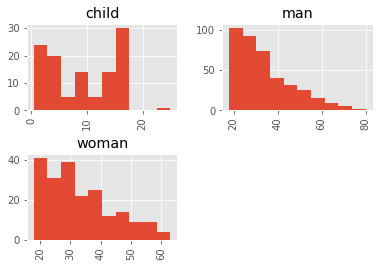

In [25]:
titanic.hist(by="who", column="age")

In [26]:
titanic[(titanic.age == 25) & (titanic.who=='child')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,title,lastName,firstName
813,0,3,female,25.0,4,2,31.275,S,Third,child,False,NaN,Southampton,no,False,Miss,Andersson,Ebba Iris Alfrida


In [27]:
titanic.loc[(titanic.age == 25) & (titanic.who=='child'), 'who'] = "woman"
titanic.loc[813,]

survived                       0
pclass                         3
sex                       female
age                           25
sibsp                          4
parch                          2
fare                      31.275
embarked                       S
class                      Third
who                        woman
adult_male                 False
deck                         NaN
embark_town          Southampton
alive                         no
alone                      False
title                       Miss
lastName               Andersson
firstName      Ebba Iris Alfrida
Name: 813, dtype: object

In [28]:
pd.crosstab(titanic["who"],titanic["sex"])

sex,female,male
who,,
child,54,58
man,0,520
woman,260,0


In [29]:
titanic[(titanic.adult_male) & ((titanic.sex != "male") | (titanic.who != "man"))]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,title,lastName,firstName
86,0,3,male,16.0,1,3,34.3750,S,Third,child,True,NaN,Southampton,no,False,Mr,Ford,William Neal
138,0,3,male,16.0,0,0,9.2167,S,Third,child,True,NaN,Southampton,no,True,Mr,Osen,Olaf Elon
163,0,3,male,17.0,0,0,8.6625,S,Third,child,True,NaN,Southampton,no,True,Mr,Calic,Jovo
220,1,3,male,16.0,0,0,8.0500,S,Third,child,True,NaN,Southampton,yes,True,Mr,Sunderland,Victor Francis
266,0,3,male,16.0,4,1,39.6875,S,Third,child,True,NaN,Southampton,no,False,Mr,Panula,Ernesti Arvid
282,0,3,male,16.0,0,0,9.5000,S,Third,child,True,NaN,Southampton,no,True,Mr,de Pelsmaeker,Alfons
333,0,3,male,16.0,2,0,18.0000,S,Third,child,True,NaN,Southampton,no,False,Mr,Vander Planke,Leo Edmondus
433,0,3,male,17.0,0,0,7.1250,S,Third,child,True,NaN,Southampton,no,True,Mr,Kallio,Nikolai Erland
500,0,3,male,17.0,0,0,8.6625,S,Third,child,True,NaN,Southampton,no,True,Mr,Calic,Petar
532,0,3,male,17.0,1,1,7.2292,C,Third,child,True,NaN,Cherbourg,no,False,Mr,Elias,Joseph Jr


In [30]:
titanic[(titanic.adult_male == False) & ((titanic.sex == "male") & (titanic.age > 18))]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,title,lastName,firstName


In [31]:
titanic.loc[(titanic.adult_male) & ((titanic.sex != "male") | (titanic.who != "man")), "adult_male"]=False

In [32]:
titanic[(titanic.age < 10) & (titanic.alone)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,title,lastName,firstName
777,1,3,female,5.0,0,0,12.475,S,Third,child,False,NaN,Southampton,yes,True,Miss,Emanuel,Virginia Ethel


In [33]:
titanic[titanic.duplicated(["firstName", "lastName", "age"], keep=False)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,title,lastName,firstName
889,1,1,male,26.0,0,0,30.0,C,First,man,True,C,Cherbourg,yes,True,Mr,Behr,Karl Howell
891,1,1,male,26.0,0,0,30.0,Q,First,man,True,C,Cherbourg,no,False,Mr,Behr,Karl Howell


In [34]:
titanic[titanic.duplicated(["firstName", "lastName", "age"], keep="first")]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,title,lastName,firstName
891,1,1,male,26.0,0,0,30.0,Q,First,man,True,C,Cherbourg,no,False,Mr,Behr,Karl Howell


In [35]:
titanic.drop_duplicates(["firstName", "lastName", "age"], keep='first', inplace=True)